# **1. Objectif**


Après avoir effectué des prédictions quotidiennes de températures à Sydney en 2017 dans le notebook 3_1_Série_temporelle_Température_Sydney_quotidienne.ipynb je vais m'intéresser à des prédictions mensuelles en utilisant encore les techniques d’analyse de séries temporelles.

Je commencerai cependant par un modèle naif afin d'étudier la pertinence de l'utilisation de modèle de série temporelle pour cette situation.

Connaissant les températures sur une période de 3 années (2014, 2015 et 2016) je cherche à prédire la température l'année suivante en 2017.
Je connais aussi les températures réelles sur les six premiers mois de l'année 2017 afin d'étudier la performance de mes modèles.


# **2. Importation des bibliothèques**


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


# **3. Jeu de données**





In [2]:
# Lecture du dataset

path_file_1 = "data/weatherAus.csv"

df=pd.read_csv(path_file_1,  header=0, parse_dates=[0], index_col=0)
df.head()

# On s'interesse uniquement à la ville de Sydney pour prévoir les températures à venir à 9am à l'aide de série temporelle
# En raison de problèmes de capacité de traitement nous nous limitons à 3 années 2014 à 2016


df_Sydney = df[df['Location']=='Sydney']
df_Sydney14_15_16 = df_Sydney[(df_Sydney.index.year== 2014)|(df_Sydney.index.year== 2015)|(df_Sydney.index.year== 2016)]
data = df_Sydney14_15_16 [['Temp9am']]
data.head()


,Temp9am
Date,
2014-01-01,24.4
2014-01-02,27.1
2014-01-03,22.2
2014-01-04,22.9
2014-01-05,24.2


In [3]:
# On s'intéresse aux températures moyennes mensuelles à 9am

data=data.resample('M').mean()
data.head()


,Temp9am
Date,
2014-01-31,23.254839
2014-02-28,22.471429
2014-03-31,21.793548
2014-04-30,18.580000
2014-05-31,15.509677


# **4. Première visualisation**

In [4]:
# dimension, index

print('data.shape :', data.shape)
data.index


data.shape : (36, 1)


DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

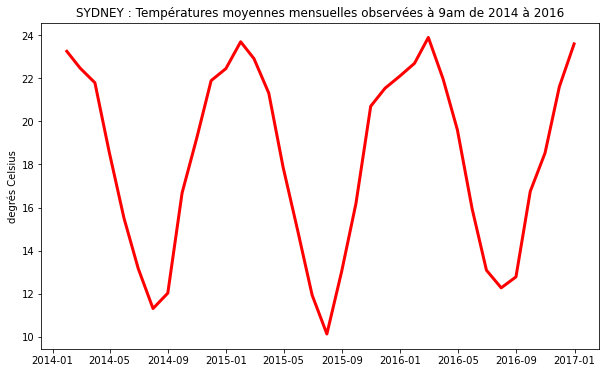

In [5]:
# Visualisation

plt.figure(figsize = (10,6))
plt.plot(data, lw=3, ls='-', color='red')
plt.title("SYDNEY : Températures moyennes mensuelles observées à 9am de 2014 à 2016")
plt.ylabel('degrés Celsius');


# **5. Un premier modèle naïf**

**Création d'un dataframe naif représentant la température moyenne des moyennes mensuelles des 3 années 2014 à 2016. Ce sera notre modèle naif de prédiction pour 2017.**

In [6]:
naif = data.groupby([data.index.month]).mean()
naif


,Temp9am
Date,
1,23.216129
2,23.092898
3,21.691398
4,18.690000
5,15.449462
6,12.730000
7,11.236559
8,12.611828
9,16.536667


**Création d'un dataframe contenant les températures mensuelles moyennes observées en 2017 : data_2017 : seuls les 6 premers mois sont disponibles**

In [7]:
df_Sydney2017 = df_Sydney[(df_Sydney.index.year== 2017)]
data_2017 = df_Sydney2017['Temp9am'].to_frame(name='Temp9am').resample('M').mean()
data_2017


,Temp9am
Date,
2017-01-31,25.267742
2017-02-28,23.835714
2017-03-31,21.770968
2017-04-30,17.590000
2017-05-31,14.822581
2017-06-30,12.168000


**Visualisation des températures observées et des températures prédites avec le modèle naif en 2017**

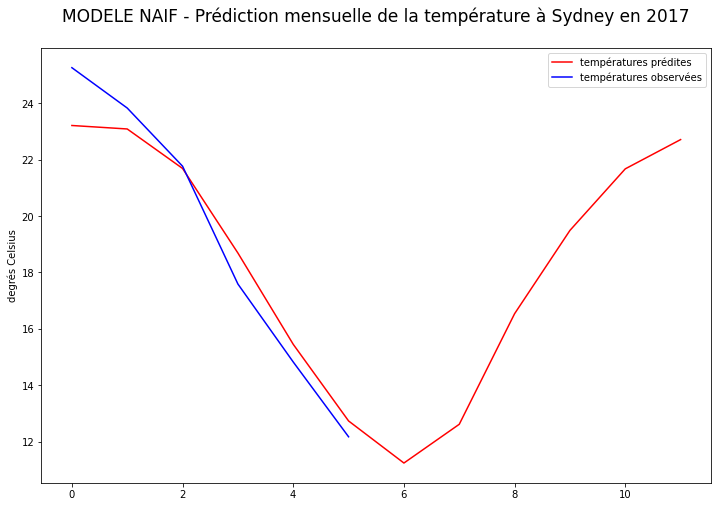

In [8]:
plt.figure(figsize=(12,8))

plt.plot(naif.values, color = 'red', label='températures prédites')
plt.plot(data_2017.values, color='blue', label='températures observées')
plt.title('MODELE NAIF - Prédiction mensuelle de la température à Sydney en 2017\n', size=17)
plt.ylabel('degrés Celsius')
plt.legend();


# **6. Etude de la série temporelle**

C:\Users\33661\AppData\Local\Temp/ipykernel_15500/3100838448.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(data, freq=12)


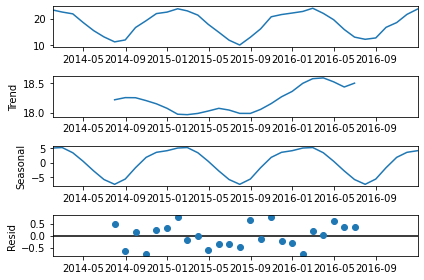

In [9]:
# Décomposition automatique de la série temporelle

res = seasonal_decompose(data, freq=12)
res.plot()
plt.show()


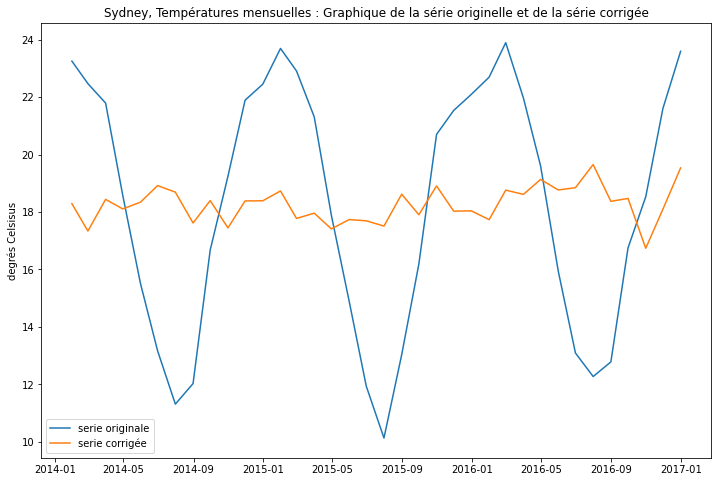

In [10]:
# Visualisation série originelle et corrigée

cvs = data['Temp9am']-res.seasonal

plt.figure(figsize=(12,8))
plt.plot(data, label='serie originale')
plt.plot(cvs, label='serie corrigée')
plt.title('Sydney, Températures mensuelles : Graphique de la série originelle et de la série corrigée')
plt.ylabel('degrés Celsisus')
plt.legend();


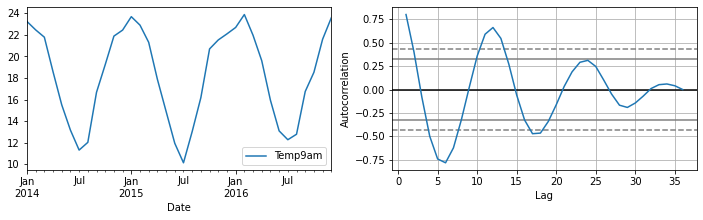

In [11]:
# Série, fonction d'autocorrélation de la série

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,3))
data.plot(ax = ax1)
pd.plotting.autocorrelation_plot(data, ax = ax2);


On constate que la décroissance de la fonction d'autocorrélation est assez lente. La série ne semble pas présenter de tendance mais seulement une périodicité de 12. On applique donc une suele différenciation avec le paramètre periods=12 sur notre série temporelle afin de voir si cela nous permet de la stationnariser.

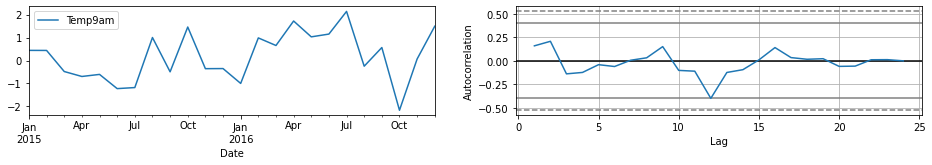

In [12]:
# Première différenciation : période 12 (mois)


data_1 = data.diff(periods=12).dropna()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,2))
data_1.plot(ax=ax1)
pd.plotting.autocorrelation_plot(data_1, ax=ax2);


In [13]:
# Test statistique pour vérifier que la série obtenue par dune différenciation de péridoe 12 est stationnaire.

sm.tsa.stattools.adfuller(data_1.iloc[:,0])[1]

0.00374654650812055

Le test statistique réalisé (le test augmenté de Dickey-Fuller (ADF)) a une p-valeur quasi nulle. On peut donc considérer la série comme stationnaire.

# **7.Modélisation SARIMA**

Le processus SARIMA combine à la fois une différenciation simple et saisonnière. Un modèle SARIMA s'écrit sousla forme SARIMA(p,d,q)(P,D,Q)k. Nous avons identifié une saisonnalité de période 12 :  k=12 

Nous avons fait uniquement une différenciation saisonnière (MA et non autorégressive AR). Donc d=0 et D=1.
Nous commencerons avec un modèle de la forme SARIMA(0,0,0)(P,1,Q)12. 

Pour déterminer les ordres P et Q il est possible de s'appuyer à nouveau sur le diagramme d'autocorrélation de la série différenciée avec une période 12 :


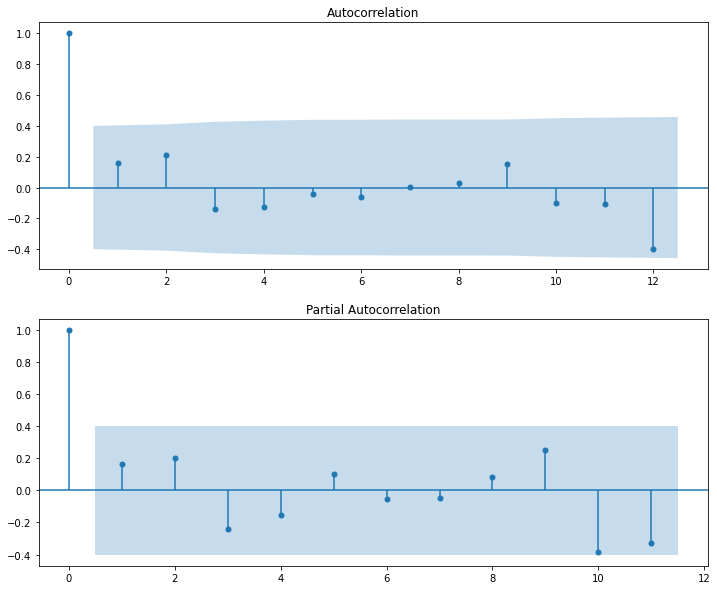

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,10))

plot_acf(data_1, lags=12, ax=ax1)
plot_pacf(data_1, lags=11, ax=ax2)
plt.show();



Pour les ordres saisonniers (P et Q), il suffit de regarder uniquement les pics saisonniers (n fois la période). Pour l'autocorrélation partielle on ne peut pas observer de pic à 12 car lags<12. On va tout de même tester P=1

On va débuter en entrainant un modèle SARIMA(0,0,0)(1,1,0)12.

In [15]:
m = sm.tsa.SARIMAX(data, order=(0,0,0), seasonal_order = (1,1,0,12))

m_fitted = m.fit()
m_fitted

print(m_fitted.summary())


                                SARIMAX Results                                 
Dep. Variable:                  Temp9am   No. Observations:                   36
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                 -30.879
Date:                  Wed, 31 Aug 2022   AIC                             65.759
Time:                          15:10:46   BIC                             68.115
Sample:                      01-31-2014   HQIC                            66.384
                           - 12-31-2016                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7469      0.197     -3.782      0.000      -1.134      -0.360
sigma2         0.5103      0.244      2.092      0.036       0.032       0.988
Ljung-Box (L1) (Q):                 

C:\Users\33661\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'



Analyse des résultats avec la méthode summary() du modèle ajusté : 

La colonne qui nous intéresse le plus est la  4ème (P>|z|) qui indique la p-valeur pour la significativité de chaque paramètre. Les p-valeur sont nulles donc les paramètres semblent être significatifs dans le modèle. 

Le test de Jarque-Bera est un test de normalité. C'est un test statistique qui vise à rejeter ou non l'hypothèse  H0  : Le résidu suit une distribution normale. Ici on lit sur la ligne Prob (JB) que la p-valeur du test est de 0.56 On ne rejette donc pas l'hypothèse.

On peut donc conclure que le modèle  SARIMA(0,0,0)(1,1,0) est satisfaisant.

In [16]:
pred=m_fitted.predict(36, 47)


In [17]:
pred=pred.to_frame(name='Temp9am')
pred


,Temp9am
2017-01-31,23.443666
2017-02-28,23.160238
2017-03-31,21.478648
2017-04-30,18.319523
2017-05-31,15.164499
2017-06-30,12.228585
2017-07-31,10.671174
2017-08-31,12.966163
2017-09-30,16.326761
2017-10-31,20.153736


In [18]:
# Concaténation des prédictions à la série originale

datapred=pd.concat([data,pred])

datapred.head()


,Temp9am
2014-01-31,23.254839
2014-02-28,22.471429
2014-03-31,21.793548
2014-04-30,18.580000
2014-05-31,15.509677


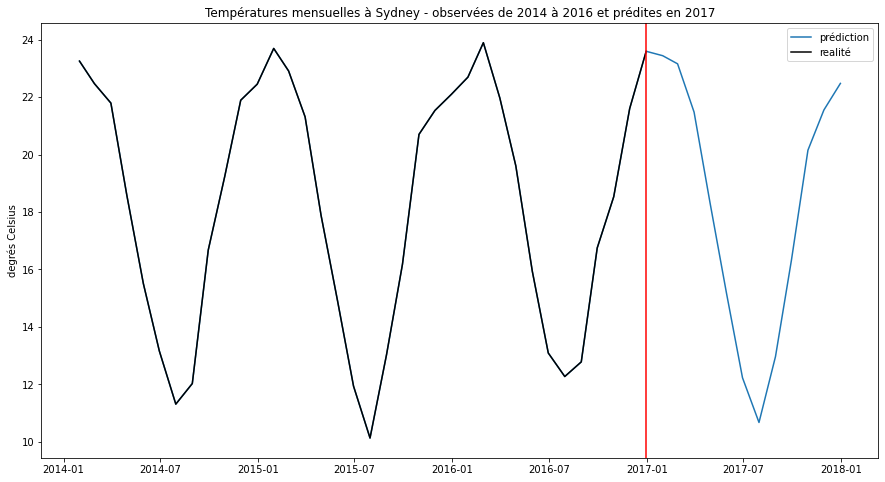

In [19]:
#  Visualisation de l'intégralité de la série ainsi que les prédictions effectuées.

import datetime

plt.figure(figsize=(15,8))
plt.plot(datapred, label='prédiction')
plt.plot(data, color='k', label='realité')

plt.axvline(x=datetime.date(2016,12,31), color='red')
plt.title('Températures mensuelles à Sydney - observées de 2014 à 2016 et prédites en 2017')
plt.legend()
plt.ylabel('degrés Celsius');


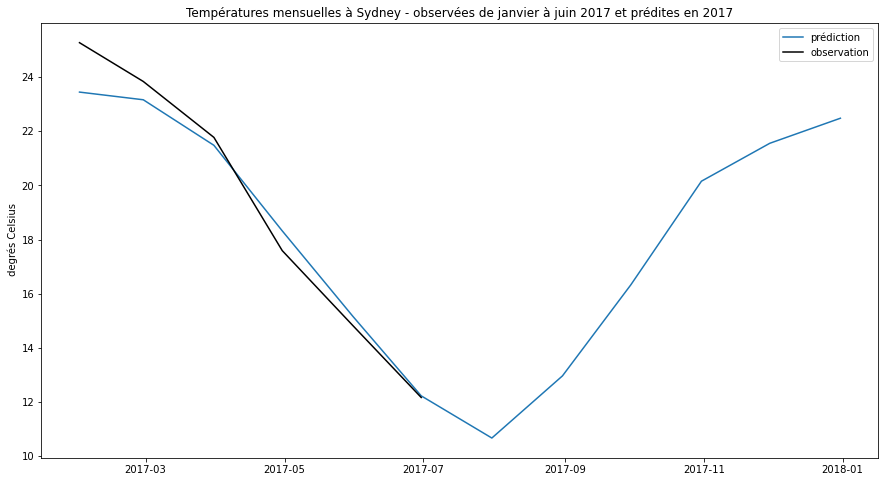

In [20]:
#  Visualisation de l'intégralité de la série ainsi que les prédictions effectuées.
import datetime

plt.figure(figsize=(15,8))
plt.plot(pred, label='prédiction')
plt.plot(data_2017, color='k', label='observation')

plt.title('Températures mensuelles à Sydney - observées de janvier à juin 2017 et prédites en 2017')
plt.legend()
plt.ylabel(' degrés Celsius');


# **8. Comparaison du modèle naif et du modèle SARIMA - MSE**

Je vais s utiliser les températures observées en 2017 pour calculer l'erreur quadratique moyenne (MSE) avec d'une part le modèle naif et d'autre part le modèle Sarima afin d'étudier la pertinence dans cette situation du modèle Sarima.

Je nedispose des températures quotidiennes observées en 2017 que sur les 6 premiers mois.

**Série des moyennes mensuelles des températures observées en 2017 :**

In [21]:
y_true = data_2017['Temp9am'].values
y_true

array([25.26774194, 23.83571429, 21.77096774, 17.59      , 14.82258065,
       12.168     ])

**Série des températures prédites avec le modèle naif pour les 6 premiers mois de l'année 2017 :**

In [22]:
y_predict_naif = naif['Temp9am'].values[:6]
y_predict_naif

array([23.21612903, 23.09289819, 21.69139785, 18.69      , 15.44946237,
       12.73      ])

**Série des températures prédites avec le modèle Sarima pour les 6 premiers mois de l'année 2017 :**

In [23]:
y_predict_sarima = pred.values[0:6]
y_predict_sarima

array([[23.44366587],
       [23.16023795],
       [21.47864835],
       [18.31952334],
       [15.16449891],
       [12.22858493]])

**Calcul de la MSE (ereur quadratique moyenne) avec les deux modèles :**

In [24]:
mse_naif = mean_squared_error(y_true, y_predict_naif)
mse_sarima = mean_squared_error(y_true, y_predict_sarima)

print("L'erreur quadratique moyenne du modèle naif est :", round(mse_naif,2))
print("L'erreur quadratique moyenne du modèle Sarima est :", round(mse_sarima,2))


L'erreur quadratique moyenne du modèle naif est : 1.11
L'erreur quadratique moyenne du modèle Sarima est : 0.75


# **9.Conclusion**

**Le modèle Sarima est ici plus performant que le modèle naïf (en terme de MSE). Il est donc pertinent de l'utiliser pour prévoir la moyenne mensuelle des températures à long terme.**